<a href="https://colab.research.google.com/github/Ps1012/zomato_analysis/blob/main/zomato_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

**Create the data frame**

In [6]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

**convert the data type of rating column - rate**

In [7]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


**Type of Resturant**

In [10]:
restaurant_types = dataframe['listed_in(type)'].unique()
print(restaurant_types)

['Buffet' 'Cafes' 'other' 'Dining']


In [33]:
import plotly.express as px

restaurant_type_counts = dataframe['listed_in(type)'].value_counts().reset_index()
restaurant_type_counts.columns = ['Restaurant Type', 'Count']

fig = px.bar(restaurant_type_counts, x='Restaurant Type', y='Count', color='Restaurant Type', title="Distribution of Restaurant Types")
fig.show()

**conclusion - majority of the resturant falls in Dinning category**

In [15]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [37]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum().reset_index()
grouped_data.columns = ['Restaurant Type', 'Total Votes']

fig = px.bar(grouped_data, x='Restaurant Type', y='Total Votes', color='Restaurant Type', title="Total Votes by Restaurant Type")
fig.show()

**Conclusion -Dinning resturant has received maximum votes**

In [32]:
fig = px.histogram(dataframe, x='rate', title='Distribution of Restaurant Ratings', nbins=20, histnorm='density')
fig.update_layout(bargap=0.1)
fig.show()

**conclusion - The majority resturants received rating from 3.5 to 4
Average orders spending by couples**

In [19]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [34]:
cost_counts = dataframe['approx_cost(for two people)'].value_counts().reset_index()
cost_counts.columns = ['Approximate Cost (for two people)', 'Count']
cost_counts = cost_counts.sort_values('Approximate Cost (for two people)')

fig = px.bar(cost_counts, x='Approximate Cost (for two people)', y='Count', color='Approximate Cost (for two people)', title='Distribution of Approximate Cost for Two People')
fig.show()

**Conclusion - The majority of couples prefer resturants with an approx cost of 300 rupees**

**Which mode receives maximum rating**

In [38]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [39]:
fig = px.box(dataframe, x='online_order', y='rate', color='online_order', title='Rating Distribution by Online Order Availability')
fig.show()

**Conclusion - offline order received lower rating in comparision to the online order**

In [40]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


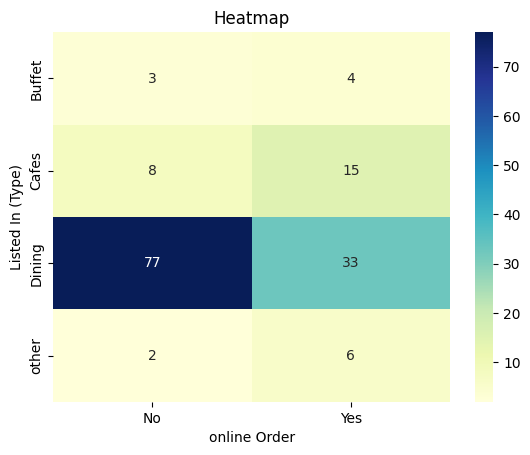

In [45]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("online Order")
plt.ylabel("Listed In (Type)")
plt.show()

**Conclusin - Dinning resturants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefers to place orders inperson at resturants, byt prefer online ordering at cafes.**